In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv("pet_adoption_data.csv")

In [32]:
data

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [6]:
categorical_col= data.select_dtypes(include="object")

In [7]:
numerical_col =data.select_dtypes(include= "number")

In [8]:
categorical_col

,PetType,Breed,Color,Size
0,Bird,Parakeet,Orange,Large
1,Rabbit,Rabbit,White,Large
2,Dog,Golden Retriever,Orange,Medium
3,Bird,Parakeet,White,Small
4,Rabbit,Rabbit,Gray,Large
...,...,...,...,...
2002,Dog,Poodle,Orange,Small
2003,Rabbit,Rabbit,Brown,Small
2004,Rabbit,Rabbit,Orange,Small
2005,Dog,Labrador,Gray,Large


In [9]:
numerical_col

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,131,5.039768,1,0,27,140,0,0
1,501,73,16.086727,0,0,8,235,0,0
2,502,136,2.076286,0,0,85,385,0,0
3,503,97,3.339423,0,0,61,217,1,0
4,504,123,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...
2002,2502,72,27.039045,1,0,66,26,1,1
2003,2503,124,4.726954,1,1,59,150,0,0
2004,2504,113,1.758592,1,0,68,302,0,0
2005,2505,12,20.961592,1,0,59,478,0,0


## DATA LIBRARY
PetID: Unique identifier for each pet.
PetType: Type of pet (e.g., Dog, Cat, Bird, Rabbit).
Breed: Specific breed of the pet.
AgeMonths: Age of the pet in months.
Color: Color of the pet.
Size: Size category of the pet (Small, Medium, Large).
WeightKg: Weight of the pet in kilograms.
Vaccinated: Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
HealthCondition: Health condition of the pet (0 - Healthy, 1 - Medical condition).
TimeInShelterDays: Duration the pet has been in the shelter (days).
AdoptionFee: Adoption fee charged for the pet (in dollars).
PreviousOwner: Whether the pet had a previous owner (0 - No, 1 - Yes).
AdoptionLikelihood: Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

In [4]:
data.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [6]:
data.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


In [7]:
data.isna().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

<Axes: >

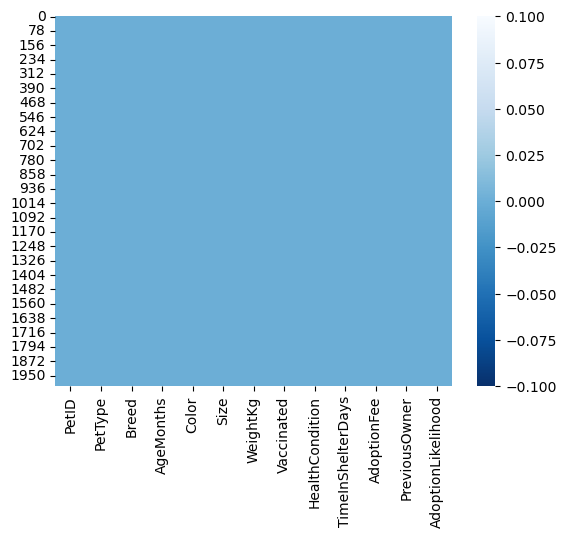

In [8]:
sns.heatmap(data.isnull(),cbar=True,cmap="Blues_r")

<Axes: xlabel='PetID'>

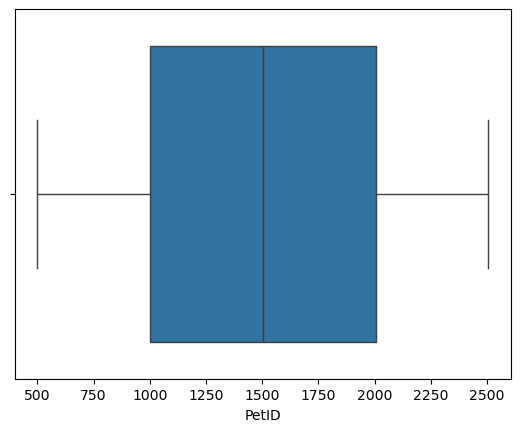

In [9]:
sns.boxplot(x=data["PetID"])

<Axes: xlabel='AgeMonths'>

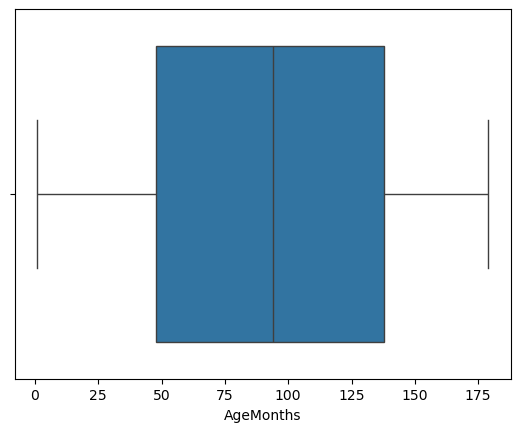

In [10]:
sns.boxplot(x=data["AgeMonths"])

<Axes: xlabel='WeightKg'>

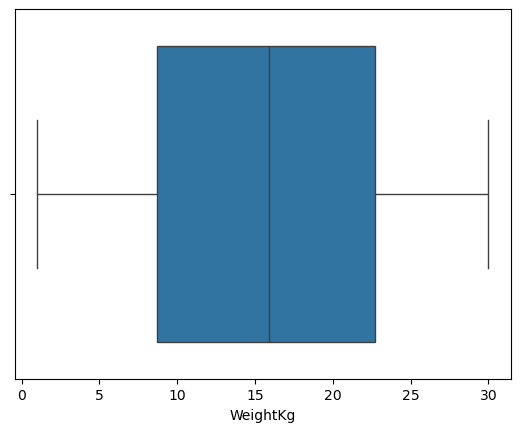

In [11]:
sns.boxplot(x=data["WeightKg"])

<Axes: xlabel='Vaccinated'>

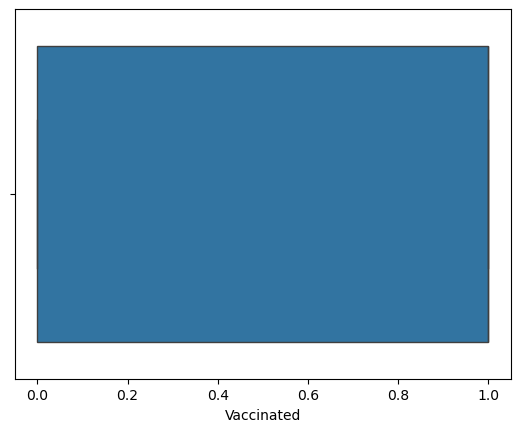

In [12]:
sns.boxplot(x=data["Vaccinated"])

<Axes: xlabel='HealthCondition'>

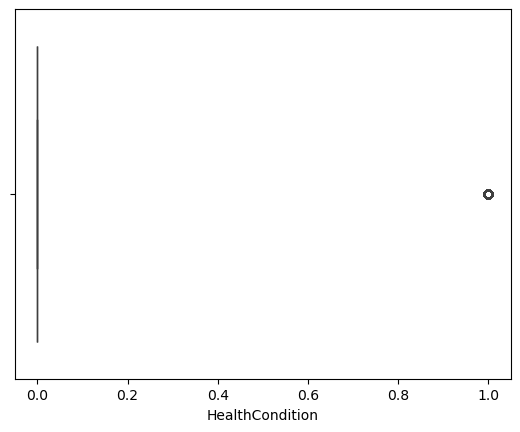

In [13]:
sns.boxplot(x=data["HealthCondition"])

<Axes: xlabel='TimeInShelterDays'>

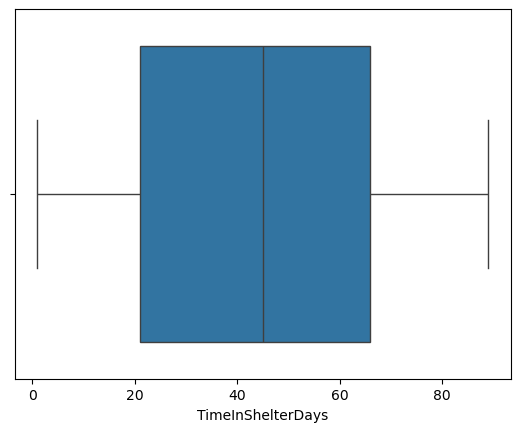

In [14]:
sns.boxplot(x=data["TimeInShelterDays"])

<Axes: xlabel='AdoptionFee'>

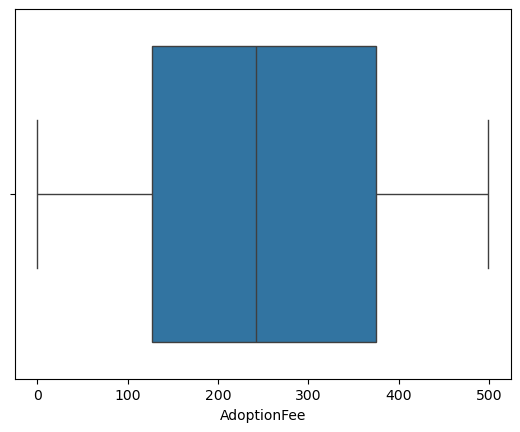

In [15]:
sns.boxplot(x=data["AdoptionFee"])

<Axes: xlabel='PreviousOwner'>

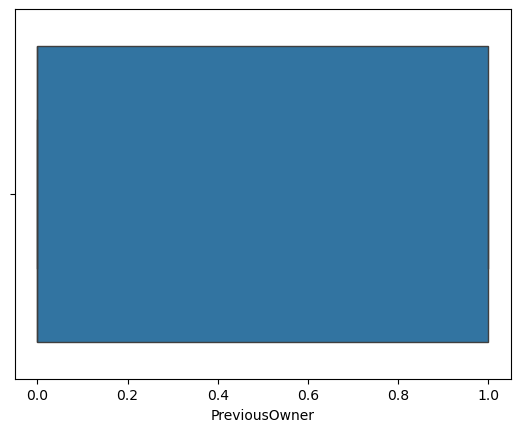

In [16]:
sns.boxplot(x=data["PreviousOwner"])

<Axes: xlabel='AdoptionLikelihood'>

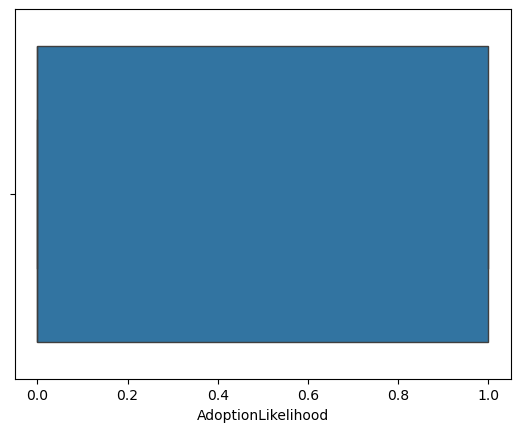

In [17]:
sns.boxplot(x=data["AdoptionLikelihood"])

In [18]:
numerical_cols=data.select_dtypes(include=["number"])
categorical_cols=data.select_dtypes(include=["object"])

In [19]:
categorical_cols["AdoptionLikelihood"]=data["AdoptionLikelihood"]

In [20]:
categorical_cols

,PetType,Breed,Color,Size,AdoptionLikelihood
0,Bird,Parakeet,Orange,Large,0
1,Rabbit,Rabbit,White,Large,0
2,Dog,Golden Retriever,Orange,Medium,0
3,Bird,Parakeet,White,Small,0
4,Rabbit,Rabbit,Gray,Large,0
...,...,...,...,...,...
2002,Dog,Poodle,Orange,Small,1
2003,Rabbit,Rabbit,Brown,Small,0
2004,Rabbit,Rabbit,Orange,Small,0
2005,Dog,Labrador,Gray,Large,0


In [21]:
print(data['Breed'].value_counts())

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64


In [22]:
print(data['PetType'].value_counts())

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64


In [23]:
print(data['Color'].value_counts())

Color
White     420
Orange    409
Gray      400
Black     395
Brown     383
Name: count, dtype: int64


In [24]:
print(data['Size'].value_counts())

Size
Medium    714
Small     663
Large     630
Name: count, dtype: int64


In [25]:
print(data['Vaccinated'].value_counts())

Vaccinated
1    1407
0     600
Name: count, dtype: int64


In [26]:
print(data['HealthCondition'].value_counts())

HealthCondition
0    1613
1     394
Name: count, dtype: int64


In [27]:
print(data['TimeInShelterDays'].value_counts())

TimeInShelterDays
15    40
52    36
21    32
6     30
79    30
      ..
32    14
39    14
16    12
80    12
11     9
Name: count, Length: 89, dtype: int64


In [28]:
print(data['PreviousOwner'].value_counts())

PreviousOwner
0    1401
1     606
Name: count, dtype: int64


In [29]:
print(data['AdoptionLikelihood'].value_counts())

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64


Text(0.5, 1.0, 'Total number of PetType')

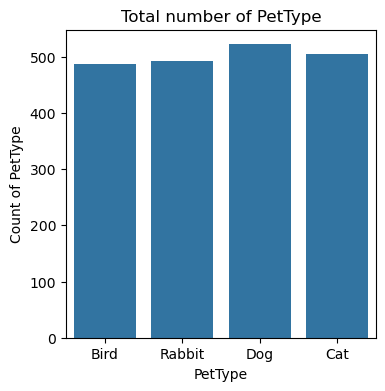

In [30]:
plt.figure(figsize =(4,4))
sns.countplot(x ="PetType", data=data)
plt.xlabel('PetType')
plt.ylabel('Count of PetType')
plt.title('Total number of PetType')

Text(0.5, 1.0, 'Total number of Breed')

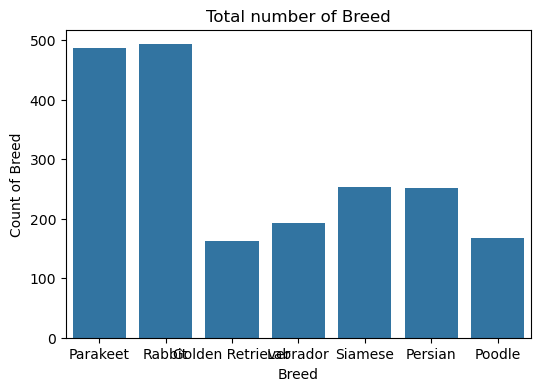

In [31]:
plt.figure(figsize =(6,4))
sns.countplot(x ="Breed", data=data)
plt.xlabel('Breed')
plt.ylabel('Count of Breed')
plt.title('Total number of Breed')

Text(0.5, 1.0, 'Total number of "Color')

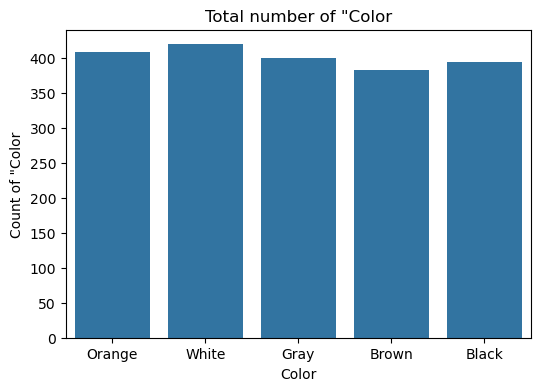

In [32]:
plt.figure(figsize =(6,4))
sns.countplot(x ="Color", data=data)
plt.xlabel('Color')
plt.ylabel('Count of "Color')
plt.title('Total number of "Color')

Text(0.5, 1.0, 'Total number of Size')

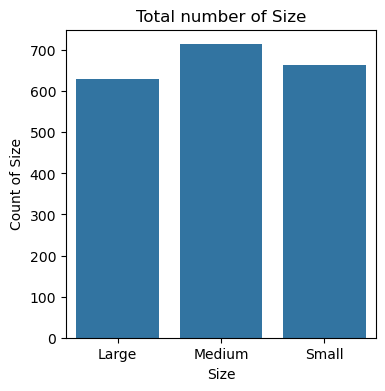

In [33]:
plt.figure(figsize =(4,4))
sns.countplot(x ="Size", data=data)
plt.xlabel('Size')
plt.ylabel('Count of Size')
plt.title('Total number of Size')

Text(0.5, 1.0, 'Total number of Vaccinated')

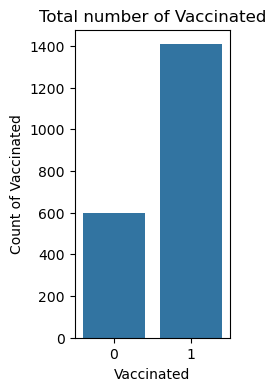

In [34]:
plt.figure(figsize =(2,4))
sns.countplot(x ="Vaccinated", data=data)
plt.xlabel('Vaccinated')
plt.ylabel('Count of Vaccinated')
plt.title('Total number of Vaccinated')

Text(0.5, 1.0, 'Total number of HealthCondition')

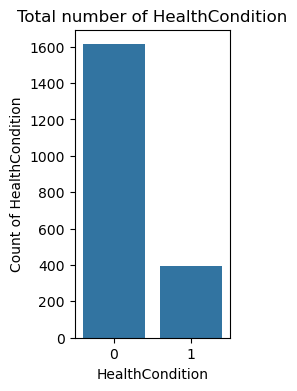

In [35]:
plt.figure(figsize =(2,4))
sns.countplot(x ="HealthCondition", data=data)
plt.xlabel('HealthCondition')
plt.ylabel('Count of HealthCondition')
plt.title('Total number of HealthCondition')

Text(0.5, 1.0, 'Total number of AdoptionFee')

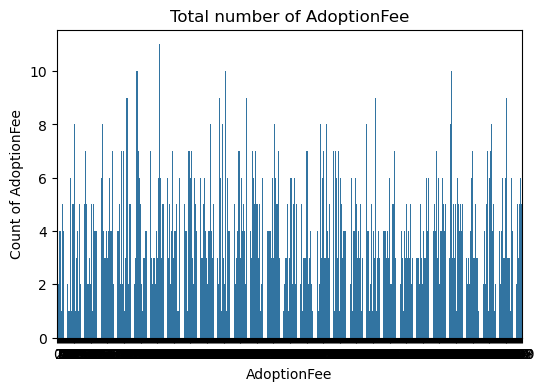

In [36]:
plt.figure(figsize =(6,4))
sns.countplot(x ="AdoptionFee", data=data)
plt.xlabel('AdoptionFee')
plt.ylabel('Count of AdoptionFee')
plt.title('Total number of AdoptionFee')

Text(0.5, 1.0, 'Total number of PreviousOwner')

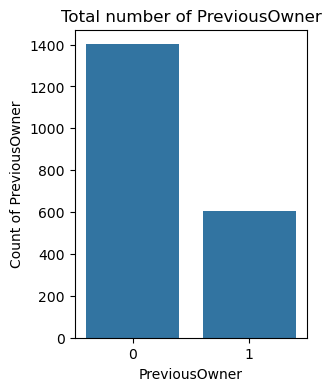

In [37]:
plt.figure(figsize =(3,4))
sns.countplot(x ="PreviousOwner", data=data)
plt.xlabel('PreviousOwner')
plt.ylabel('Count of PreviousOwner')
plt.title('Total number of PreviousOwner')

Text(0.5, 1.0, 'Total number of AdoptionLikelihood')

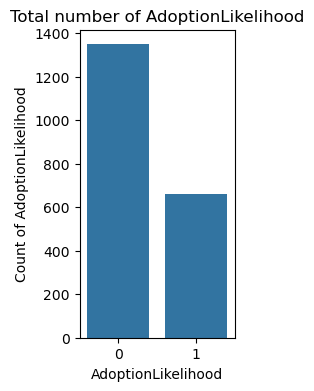

In [38]:
plt.figure(figsize =(2,4))
sns.countplot(x ="AdoptionLikelihood", data=data)
plt.xlabel('AdoptionLikelihood')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total number of AdoptionLikelihood')

In [39]:
def AL (AdoptionLikelihood):
    if AdoptionLikelihood == 1:
        return "YES"
    else:
        return "NO"

data['AL']= data['AdoptionLikelihood'].apply(AL)

In [40]:
data

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AL
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,NO
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,NO
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,NO
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,NO
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1,YES
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0,NO
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0,NO
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0,NO


In [41]:
def TSD(TimeInShelterDays):
    if TimeInShelterDays <=30:
        return "1month old"
    elif TimeInShelterDays <=60:
        return "2month old"
    elif TimeInShelterDays <=120:
        return "3month old"
    else:
        return "Over 4month old"

data ['TSD'] = data["TimeInShelterDays"].apply(TSD)

In [42]:
data

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AL,TSD
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,NO,1month old
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,NO,1month old
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,NO,3month old
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,NO,3month old
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,NO,1month old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1,YES,3month old
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0,NO,2month old
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0,NO,3month old
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0,NO,2month old


Text(0.5, 1.0, 'Total Number Of PetType')

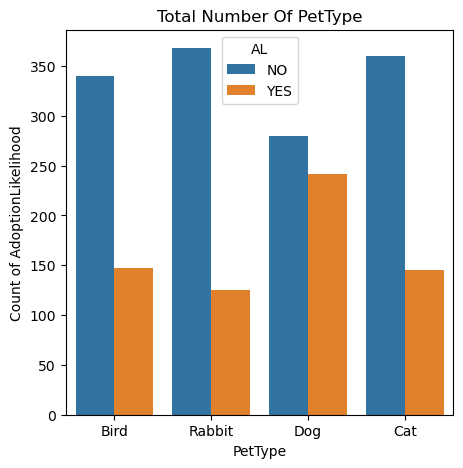

In [43]:
plt.figure(figsize =(5,5))
sns.countplot(x= 'PetType',data=data ,hue='AL')
plt.xlabel('PetType')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total Number Of PetType')

Text(0.5, 1.0, 'Total Number Of Breed')

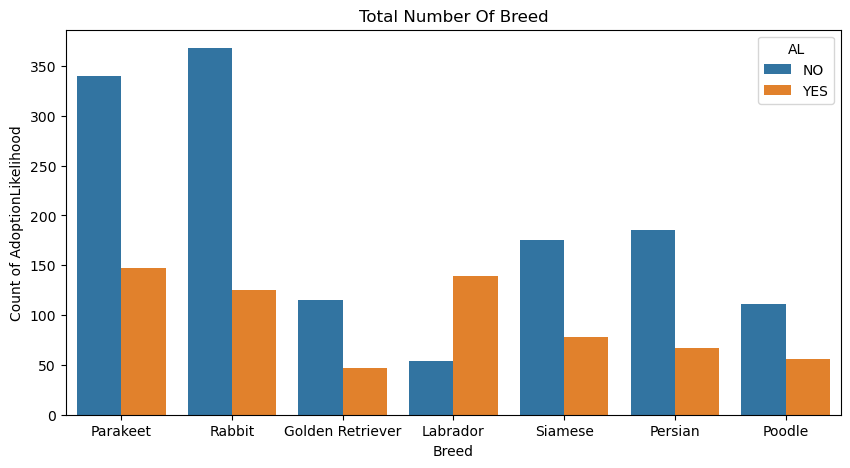

In [44]:
plt.figure(figsize =(10,5))
sns.countplot(x= 'Breed',data=data ,hue='AL')
plt.xlabel('Breed')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total Number Of Breed')

Text(0.5, 1.0, 'Total Number Of Size')

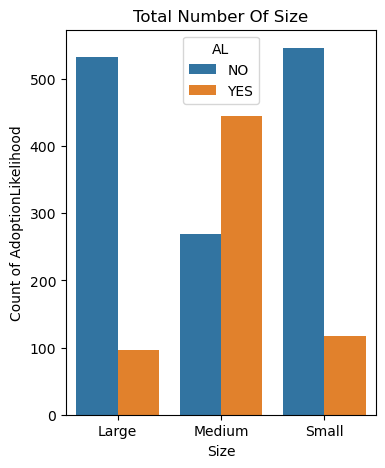

In [45]:
plt.figure(figsize =(4,5))
sns.countplot(x= 'Size',data=data ,hue='AL')
plt.xlabel('Size')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total Number Of Size')

Text(0.5, 1.0, 'Total Number Of Vaccinated')

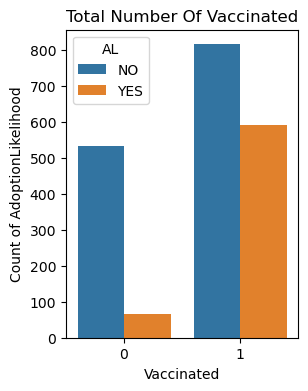

In [46]:
plt.figure(figsize =(3,4))
sns.countplot(x= 'Vaccinated',data=data ,hue='AL')
plt.xlabel('Vaccinated')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total Number Of Vaccinated')

Text(0.5, 1.0, 'Total Number Of TSD')

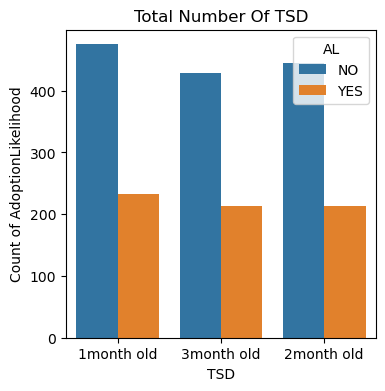

In [47]:
plt.figure(figsize =(4,4))
sns.countplot(x= 'TSD',data=data ,hue='AL')
plt.xlabel('TSD')
plt.ylabel('Count of AdoptionLikelihood')
plt.title('Total Number Of TSD')

In [48]:
corr_table = data.corr(numeric_only=True)

In [49]:
corr_table

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
PetID,1.000000,-0.008464,0.034315,0.008808,0.010486,0.017683,0.010557,0.001339,0.049582
AgeMonths,-0.008464,1.000000,-0.029189,-0.001801,0.017200,0.036837,-0.038129,0.034943,-0.202209
WeightKg,0.034315,-0.029189,1.000000,0.022526,0.000708,-0.000980,-0.002367,-0.049155,0.017601
Vaccinated,0.008808,-0.001801,0.022526,1.000000,0.024079,-0.001123,0.021662,-0.011460,0.301311
HealthCondition,0.010486,0.017200,0.000708,0.024079,1.000000,-0.012664,-0.002537,0.013755,-0.244061
TimeInShelterDays,0.017683,0.036837,-0.000980,-0.001123,-0.012664,1.000000,-0.007104,0.007958,0.008867
AdoptionFee,0.010557,-0.038129,-0.002367,0.021662,-0.002537,-0.007104,1.000000,0.009755,-0.005486
PreviousOwner,0.001339,0.034943,-0.049155,-0.011460,0.013755,0.007958,0.009755,1.000000,-0.023065
AdoptionLikelihood,0.049582,-0.202209,0.017601,0.301311,-0.244061,0.008867,-0.005486,-0.023065,1.000000


<Axes: >

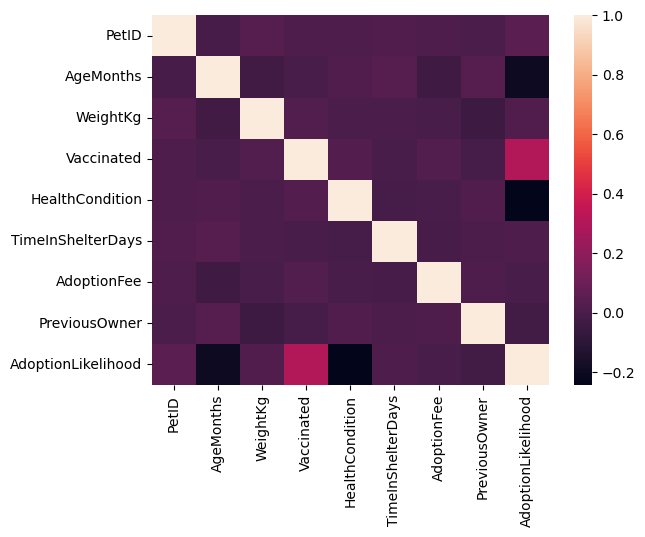

In [50]:
sns.heatmap(corr_table)

In [51]:
data

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AL,TSD
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,NO,1month old
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,NO,1month old
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,NO,3month old
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,NO,3month old
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,NO,1month old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1,YES,3month old
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0,NO,2month old
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0,NO,3month old
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0,NO,2month old


In [52]:
data.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood', 'AL', 'TSD'],
      dtype='object')

In [12]:
df1=data[['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner']]
label=data[['AdoptionLikelihood']]

In [13]:
scaler= MinMaxScaler()
df1["Scaler_WeightKg"] = scaler.fit_transform(df1['WeightKg'].values.reshape(-1, 1))
df1["Scaler_AgeMonths"] = scaler.fit_transform(df1['AgeMonths'].values.reshape(-1, 1))
df1["Scaler_TimeInShelterDays"] = scaler.fit_transform(df1['TimeInShelterDays'].values.reshape(-1, 1))
df1["Scaler_Vaccinated"] = scaler.fit_transform(df1['Vaccinated'].values.reshape(-1, 1))
df1["Scaler_HealthCondition"] = scaler.fit_transform(df1['HealthCondition'].values.reshape(-1, 1))
df1["Scaler_PreviousOwner"] = scaler.fit_transform(df1['PreviousOwner'].values.reshape(-1, 1))
df1["Scaler_AdoptionFee"] = scaler.fit_transform(df1['AdoptionFee'].values.reshape(-1, 1))

df1.drop(['PetType', 'Breed', 'Color', 'Size','WeightKg','PreviousOwner','Vaccinated','HealthCondition','AgeMonths','TimeInShelterDays','AdoptionFee'], axis=1, inplace=True)

In [14]:
df1

,PetID,Scaler_WeightKg,Scaler_AgeMonths,Scaler_TimeInShelterDays,Scaler_Vaccinated,Scaler_HealthCondition,Scaler_PreviousOwner,Scaler_AdoptionFee
0,500,0.138783,0.730337,0.295455,1.0,0.0,0.0,0.280561
1,501,0.520009,0.404494,0.079545,0.0,0.0,0.0,0.470942
2,502,0.036514,0.758427,0.954545,0.0,0.0,0.0,0.771543
3,503,0.080105,0.539326,0.681818,0.0,0.0,1.0,0.434870
4,504,0.672244,0.685393,0.306818,0.0,0.0,1.0,0.028056
...,...,...,...,...,...,...,...,...
2002,2502,0.897969,0.398876,0.738636,1.0,0.0,1.0,0.052104
2003,2503,0.127988,0.691011,0.659091,1.0,1.0,0.0,0.300601
2004,2504,0.025551,0.629213,0.761364,1.0,0.0,0.0,0.605210
2005,2505,0.688239,0.061798,0.659091,1.0,0.0,0.0,0.957916


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PetID                     2007 non-null   int64  
 1   Scaler_WeightKg           2007 non-null   float64
 2   Scaler_AgeMonths          2007 non-null   float64
 3   Scaler_TimeInShelterDays  2007 non-null   float64
 4   Scaler_Vaccinated         2007 non-null   float64
 5   Scaler_HealthCondition    2007 non-null   float64
 6   Scaler_PreviousOwner      2007 non-null   float64
 7   Scaler_AdoptionFee        2007 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 125.6 KB


In [57]:
df1.isnull().sum()

PetID                       0
Scaler_WeightKg             0
Scaler_AgeMonths            0
Scaler_TimeInShelterDays    0
Scaler_Vaccinated           0
Scaler_HealthCondition      0
Scaler_PreviousOwner        0
Scaler_AdoptionFee          0
dtype: int64

In [58]:
label

,AdoptionLikelihood
0,0
1,0
2,0
3,0
4,0
...,...
2002,1
2003,0
2004,0
2005,0


In [21]:
X_train,X_test,y_train,y_test = train_test_split(df1 ,label, test_size=0.7,random_state=42)

In [60]:
X_train

,PetID,Scaler_WeightKg,Scaler_AgeMonths,Scaler_TimeInShelterDays,Scaler_Vaccinated,Scaler_HealthCondition,Scaler_PreviousOwner,Scaler_AdoptionFee
916,1416,0.485381,0.376404,0.829545,1.0,0.0,0.0,0.839679
261,761,0.809372,0.960674,0.488636,0.0,0.0,1.0,0.817635
607,1107,0.340787,0.943820,0.477273,0.0,0.0,0.0,0.747495
1331,1831,0.063675,0.752809,0.556818,0.0,1.0,0.0,0.685371
240,740,0.894076,0.943820,0.818182,1.0,0.0,0.0,0.110220
...,...,...,...,...,...,...,...,...
1130,1630,0.755965,0.921348,0.545455,1.0,0.0,0.0,0.098196
1294,1794,0.253601,0.449438,0.806818,1.0,0.0,0.0,0.825651
860,1360,0.932227,0.101124,0.340909,1.0,0.0,1.0,0.492986
1459,1959,0.443574,0.865169,0.977273,1.0,0.0,1.0,0.839679


In [61]:
y_train

,AdoptionLikelihood
916,1
261,0
607,0
1331,0
240,0
...,...
1130,0
1294,0
860,1
1459,0


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:" ,accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:",recall_score(y_test,ly_pred))
print("F1_score:", f1_score(y_test , ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.7202846975088968
Precision: 0.5837696335078534
Recall: 0.487964989059081
F1_score: 0.5315852205005959
AUC-ROC: 0.6601217350358696


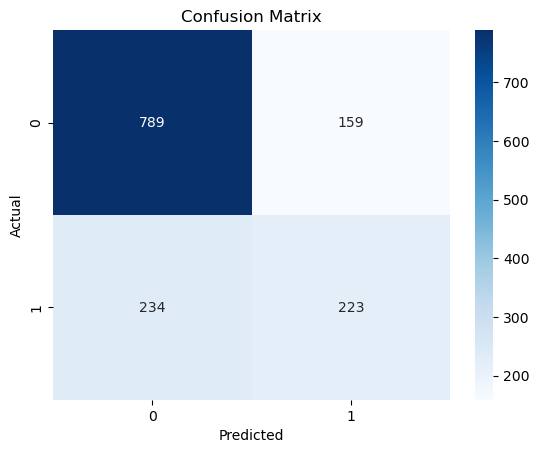

In [23]:
cm = confusion_matrix(y_test, ly_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:" ,accuracy_score(y_test,rfc_pred))
print("Precision:", precision_score(y_test,rfc_pred))
print("Recall:",recall_score(y_test,rfc_pred))
print("F1_score:", f1_score(y_test , rfc_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfc_pred))

Random Forest
Accuracy: 0.7224199288256228
Precision: 0.6098360655737705
Recall: 0.40700218818380746
F1_score: 0.4881889763779527
AUC-ROC: 0.640737381011735


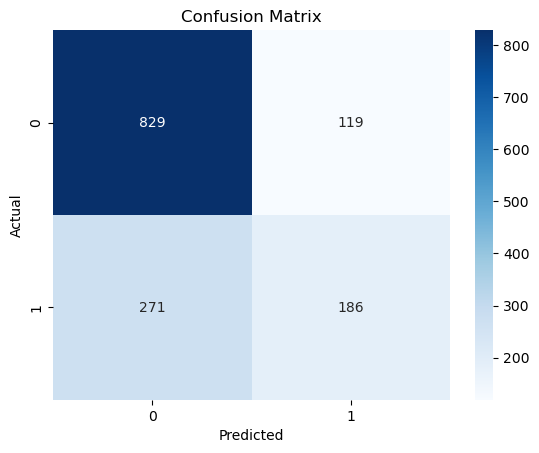

In [25]:
cm = confusion_matrix(y_test, rfc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("SGDClassifier")
print("Accuracy:" ,accuracy_score(y_test,sgd_pred))
print("Precision:", precision_score(y_test,sgd_pred))
print("Recall:",recall_score(y_test,sgd_pred))
print("F1_score:", f1_score(y_test , sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))

SGDClassifier
Accuracy: 0.6747330960854092
Precision: 0.0
Recall: 0.0
F1_score: 0.0
AUC-ROC: 0.5


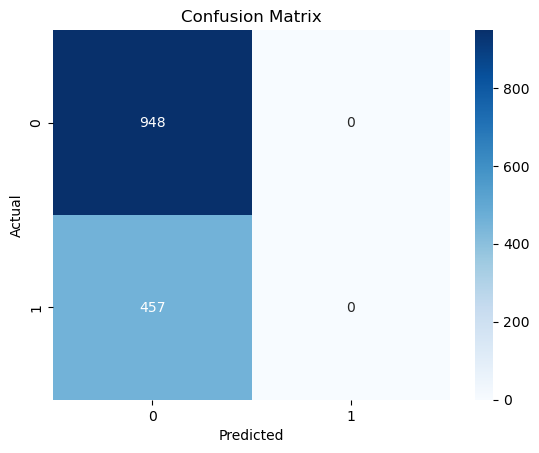

In [27]:
cm = confusion_matrix(y_test, sgd_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
dtc =  DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print(" DecisionTreeClassifier")
print("Accuracy:" ,accuracy_score(y_test,dtc_pred))
print("Precision:", precision_score(y_test,dtc_pred))
print("Recall:",recall_score(y_test,dtc_pred))
print("F1_score:", f1_score(y_test , dtc_pred))
print("AUC-ROC:", roc_auc_score(y_test, dtc_pred))

 DecisionTreeClassifier
Accuracy: 0.6946619217081851
Precision: 0.5311111111111111
Recall: 0.5229759299781181
F1_score: 0.5270121278941565
AUC-ROC: 0.6502010451578355


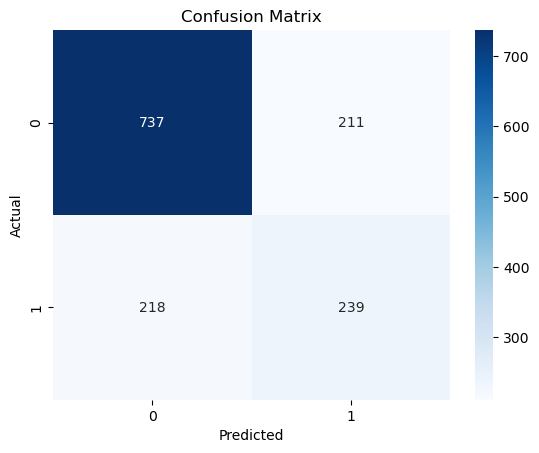

In [29]:
cm = confusion_matrix(y_test, dtc_pred)

##To visualize the confusion Matrix
sns.heatmap(cm ,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()